# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset 
df = pd.read_csv("ecommerce_data.csv", encoding="latin1")

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Display the first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [11]:
# Display the dimensions of the dataset
df.shape

(536641, 8)

In [13]:
# Check for missing values in the dataset
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# Fill missing values
df["Description"] = df["Description"].fillna("Unknown")
df['CustomerID'].fillna(-1, inplace=True)

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_1437/17667984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)


In [17]:
# Convert the 'InvoiceDate' column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
# Calculate the difference in days since the last purchase for each customer
df = df.sort_values(by=["CustomerID", "InvoiceDate"])

df["Days_since_last_purchase"] = df.groupby("CustomerID")["InvoiceDate"].diff().dt.days
df["Days_since_last_purchase"].fillna(0, inplace=True)

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_1437/4115824020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Days_since_last_purchase"].fillna(0, inplace=True)


In [21]:
# Calculate the purchase frequency and monetary value for each customer
df['purchase_frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['monetary_value'] = df.groupby('CustomerID')['UnitPrice'].transform('sum')

In [23]:
# Calculate the number of distinct products purchased by each customer
df['distinct_products_purchased'] = df.groupby('CustomerID')['StockCode'].transform('nunique')

In [25]:
# Display basic information after performing transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 622 to 423941
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   InvoiceNo                    536641 non-null  object        
 1   StockCode                    536641 non-null  object        
 2   Description                  536641 non-null  object        
 3   Quantity                     536641 non-null  int64         
 4   InvoiceDate                  536641 non-null  datetime64[ns]
 5   UnitPrice                    536641 non-null  float64       
 6   CustomerID                   536641 non-null  float64       
 7   Country                      536641 non-null  object        
 8   Days_since_last_purchase     536641 non-null  float64       
 9   purchase_frequency           536641 non-null  int64         
 10  monetary_value               536641 non-null  float64       
 11  distinct_products_purchased  

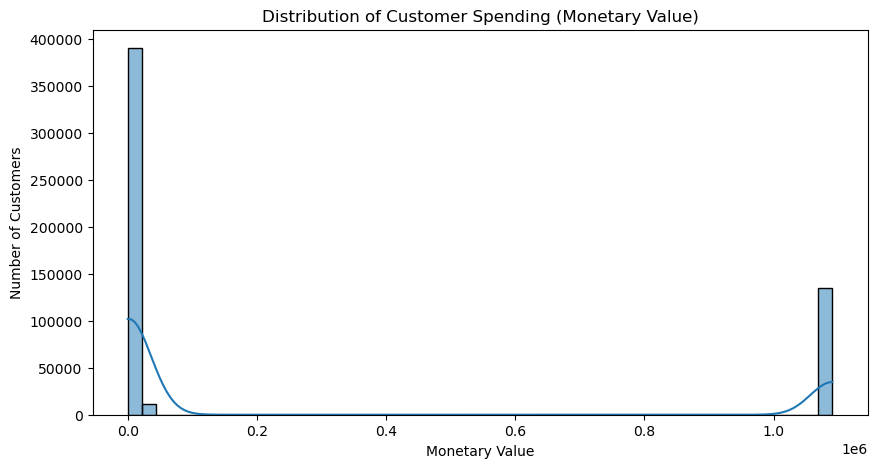

In [27]:
# Plot the distribution of customer spending
plt.figure(figsize=(10, 5))
sns.histplot(df['monetary_value'], bins=50, kde=True)
plt.title("Distribution of Customer Spending (Monetary Value)")
plt.xlabel("Monetary Value")
plt.ylabel("Number of Customers")
plt.show()

In [28]:
print("Count of maximum value:", (df['monetary_value'] == df['monetary_value'].max()).sum())

Count of maximum value: 135037


#### `Around 400000 customers have a monetary value of $10000 and 135037 customers have a monetary value greater than $1 million.`




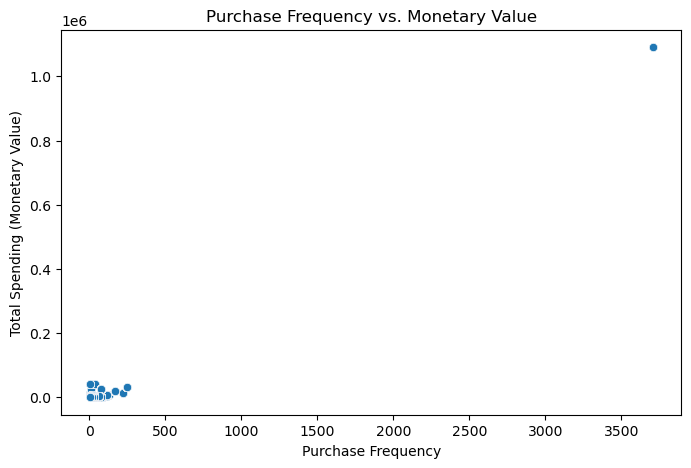

In [32]:
# Create a scatter plot to show the relationship between purchase frequency and monetary value
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['purchase_frequency'], y=df['monetary_value'])
plt.title("Purchase Frequency vs. Monetary Value")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending (Monetary Value)")
plt.show()

#### From the plot above, we can observe that customers who make infrequent purchases tend to have lower monetary value, while those who purchase more frequently exhibit higher monetary value.

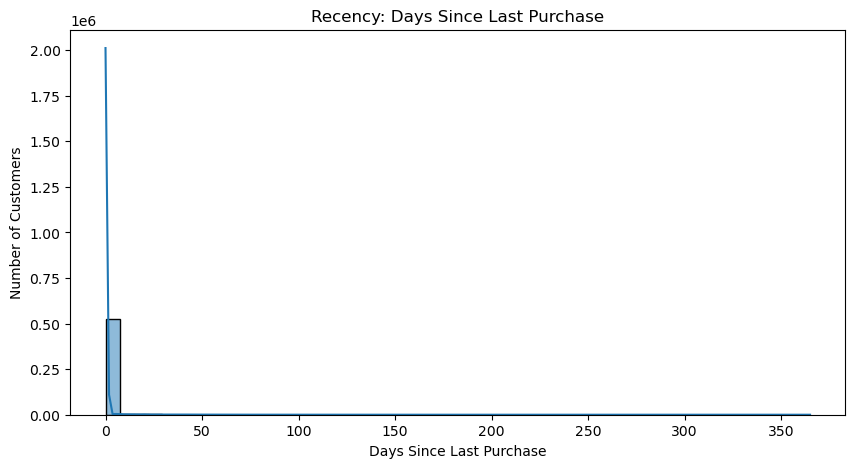

In [35]:
# Plotting the distribution of days since the last purchase to analyze customer recency
plt.figure(figsize=(10, 5))
sns.histplot(df['Days_since_last_purchase'], bins=50, kde=True)
plt.title("Recency: Days Since Last Purchase")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.show()

#### We observe that approximately 50 million customers made a purchase within the last 10 days 

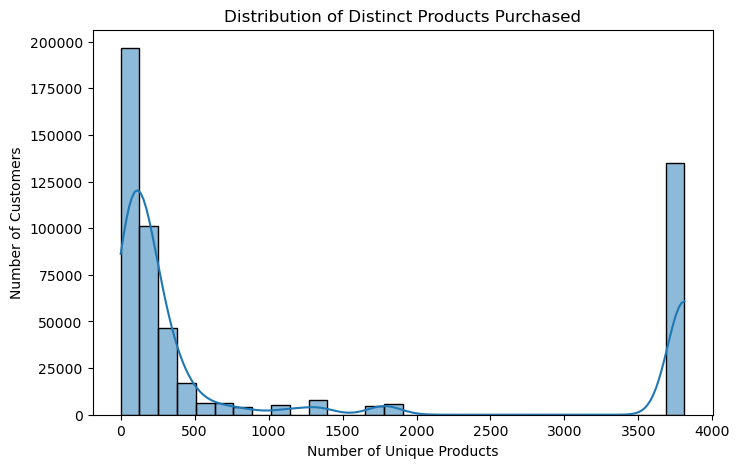

In [38]:
# Plotting the distribution of distinct products purchased by customers
plt.figure(figsize=(8, 5))
sns.histplot(df['distinct_products_purchased'], bins=30, kde=True)
plt.title("Distribution of Distinct Products Purchased")
plt.xlabel("Number of Unique Products")
plt.ylabel("Number of Customers")
plt.show()

#### Majority of customers make repeat purchases of the same products that they have already purchased

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_1437/4243809653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'].astype(str), palette='coolwarm')


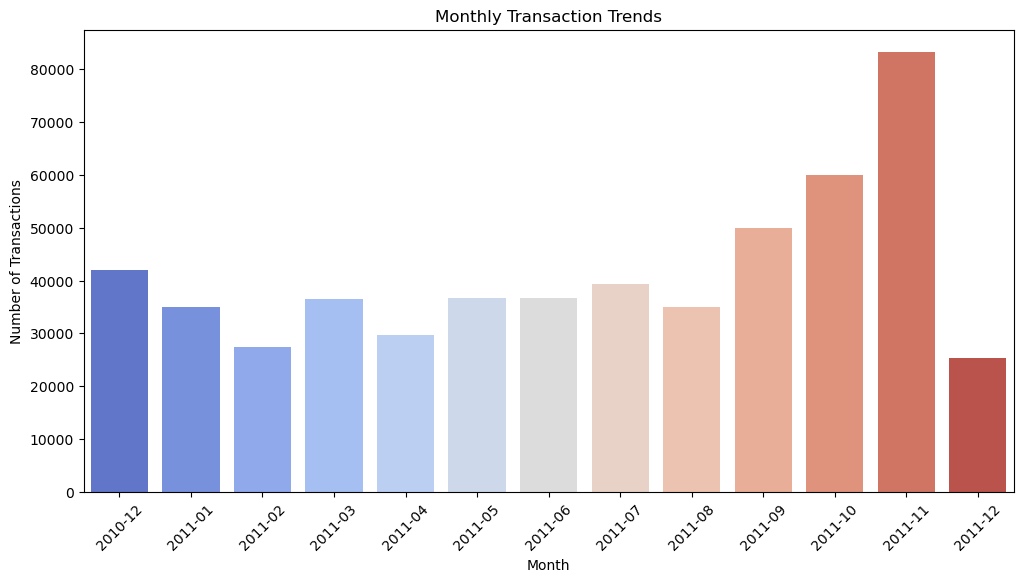

In [40]:
# Counting the number of transactions per month
df['Month'] = df['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Month'].astype(str), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

#### Customers made the maximum number of purchases in the month of November

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_1437/1057253162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


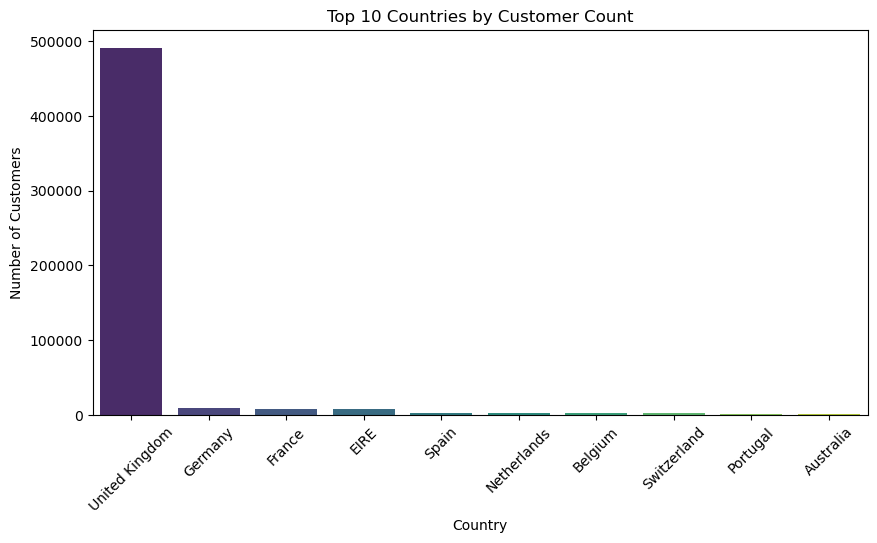

In [43]:
# Identifying and visualizing the top 10 countries by customer count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title("Top 10 Countries by Customer Count")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

#### The majority of customers are from the United Kingdom, with a significant number also coming from Germany, France, and Eire

In [47]:
# Encoding categorical columns using LabelEncoder for numerical representation
df['InvoiceNo_Encoded'] = LabelEncoder().fit_transform(df['InvoiceNo'])
df['StockCode'] = LabelEncoder().fit_transform(df['StockCode'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df['Description'] = LabelEncoder().fit_transform(df['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Days_since_last_purchase,purchase_frequency,monetary_value,distinct_products_purchased,Month,InvoiceNo_Encoded
622,536414,1094,3740,56,2010-12-01 11:52:00,0.00,-1.0,36,0.0,3710,1090875.12,3810,2010-12,43
1443,536544,826,1000,1,2010-12-01 14:32:00,2.51,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1444,536544,827,996,2,2010-12-01 14:32:00,2.51,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1445,536544,833,2729,4,2010-12-01 14:32:00,0.85,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1446,536544,834,2805,2,2010-12-01 14:32:00,1.66,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84


In [49]:
df = df.drop(columns=['InvoiceNo','Month'])

In [51]:
# Displaying a summary of the DataFrame after encoding the categorical varaibles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 622 to 423941
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   StockCode                    536641 non-null  int64         
 1   Description                  536641 non-null  int64         
 2   Quantity                     536641 non-null  int64         
 3   InvoiceDate                  536641 non-null  datetime64[ns]
 4   UnitPrice                    536641 non-null  float64       
 5   CustomerID                   536641 non-null  float64       
 6   Country                      536641 non-null  int64         
 7   Days_since_last_purchase     536641 non-null  float64       
 8   purchase_frequency           536641 non-null  int64         
 9   monetary_value               536641 non-null  float64       
 10  distinct_products_purchased  536641 non-null  int64         
 11  InvoiceNo_Encoded            

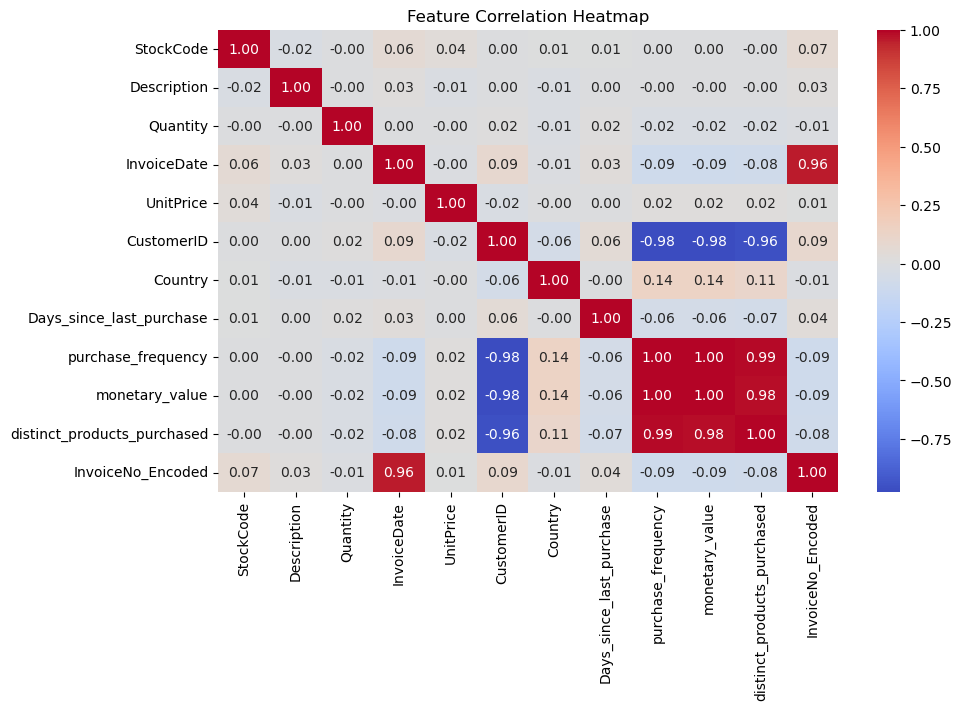

In [53]:
# Plotting a heatmap to visualize the correlation between features in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### Overall Analysis of the Correlation Heatmap:

##### InvoiceNo_Encoded & InvoiceDate - Suggests that older transactions have smaller invoice numbers, and newer ones have larger invoice numbers.
##### CustomerID & purchase_frequency - Strong negative correlation means that customers with lower IDs tend to purchase more frequently.This indicates that older or long-time customers are more engaged in repeat purchases.
##### CustomerID & monetary_value - Similar to purchase_frequency, this negative correlation suggests that customers with lower IDs contribute more revenue. Indicates that certain customers make significantly more purchases than others.
##### purchase_frequency & monetary_value - customers who buy more frequently tend to have a higher monetary value.
##### purchase_frequency & distinct_products_purchased - suggests that customers who purchase frequently also buy a diverse range of products. This indicates broad shopping preferences among active buyers.
##### InvoiceNo_Encoded & purchase_frequency - newer invoices are weakly associated with lower purchase frequency. Could suggest that newer customers shop less frequently.
##### Country & CustomerID - suggests that customer IDs may be region-specific to some extent.
##### Days_since_last_purchase & purchase_frequency - Weak negative correlation means that frequent shoppers have shorter gaps between their purchases.

### Overall Insights for Customer Segmentation & Marketing:
##### Loyal Customers Matter: Customers with low IDs buy more often and spend more - good targets for loyalty programs.
##### Frequent Buyers Like Variety: People who buy frequently also buy a diverse range of products - recommendation systems should leverage this.
##### Invoice Numbers Track Time: Since invoice numbers correlate highly with InvoiceDate, they can be ignored for clustering purposes.